In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

nba_df= pd.read_csv("Resources/shot_logs.csv")


In [2]:
nba_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [3]:
#id unique shooters, and count
nba_shooter= nba_df['player_name'].unique()
print(len(nba_shooter))
name_check= nba_df['CLOSEST_DEFENDER_PLAYER_ID'].unique()
print(len(name_check))

grouped_def_df=nba_df.groupby("CLOSEST_DEFENDER_PLAYER_ID")
#convert all NaN in Shot_clock category to game_clock
#drop columns
cleaned_df= nba_df.drop(columns=["MATCHUP", "LOCATION", "DRIBBLES", "TOUCH_TIME"])
cleaned_df

281
474


,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [4]:
#convert all NaN in Shot_clock category to game_clock

In [5]:
#rename player_name and player_id to fit all caps style
cleaned_df.rename(columns={"player_name": "PLAYER_NAME",
                  "player_id": "PLAYER_ID"})

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [6]:
#convert all NaN in Shot_clock category to game_clock
cleaned_df["SHOT_CLOCK"].fillna(cleaned_df["GAME_CLOCK"], inplace=True)
cleaned_df

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,0:00,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [7]:
cleaned_df.dtypes

GAME_ID                         int64
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                     object
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [8]:
to_clean= cleaned_df["GAME_CLOCK"].str.split(":",expand=True).astype(int)
cleaned_df["GAME_CLOCK_SECONDS"]=to_clean[0]*60 + to_clean[1]
counter= 0
cleaned_df["TOTAL_TIME_SECONDS"] = ""
for index,rows in cleaned_df.iterrows(): 
    multiplier= 0
    if rows["PERIOD"] == 1:
        multiplier= 36*60
    elif rows["PERIOD"] == 2:
        multiplier= 24*60
    elif rows["PERIOD"] == 3:
        multiplier= 12*60
    cleaned_df.loc[index,["TOTAL_TIME_SECONDS"]]=multiplier+cleaned_df["GAME_CLOCK_SECONDS"][index]

cleaned_df

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,69,2229
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,14,2174
2,21400899,W,24,3,1,0:00,0:00,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0,2160
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,707,2147
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,634,2074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127,112,832
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127,688,688
128066,21400006,L,-16,7,4,11:10,23,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127,670,670
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127,157,157


In [9]:
to_clean.rename(columns={0: "MINUTES", 1: "SECONDS"}, inplace=True)
# print(to_clean)
#merge into cleaned_df
cleaned_df=pd.concat([cleaned_df, to_clean], axis=1)
# print(new_df)
#if 0 column== 0 AND if column 1 <= 24 then replace
counter=0

In [10]:
cleaned_df.to_csv("Resources/Final_nba_df.csv")

In [11]:
#group by FGM to find if open shots were made more often than defended shots
#open_contested = cleaned_df.loc[cleaned_df["FGM"] == 1].groupby(["FGM"])
#open_contested.head()
#not grouping correctly
import seaborn as sns

In [12]:
#open shots made percentage, finding shots 6ft or greater from closest defender
open_shots = cleaned_df.loc[cleaned_df["CLOSE_DEF_DIST"] >=6]
open_shots                            

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,...,202711,6.1,0,0,brian roberts,203148,14,2174,0,14
6,21400899,W,24,7,4,10:15,14.5,20.7,2,missed,...,101127,6.1,0,0,brian roberts,203148,615,615,10,15
8,21400899,W,24,9,4,5:14,12.4,24.6,3,missed,...,202721,7.3,0,0,brian roberts,203148,314,314,5,14
9,21400890,W,1,1,2,11:32,17.4,22.4,3,missed,...,201961,19.8,0,0,brian roberts,203148,692,2132,11,32
18,21400859,L,-8,5,4,10:29,20.8,24.2,3,made,...,202738,11.1,1,3,brian roberts,203148,629,629,10,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127999,21400149,L,-12,3,2,10:42,2.9,17.6,2,made,...,201596,8.3,1,2,jarrett jack,101127,642,2082,10,42
128035,21400090,W,8,4,2,0:55,21.8,17.0,2,made,...,203095,6.9,1,2,jarrett jack,101127,55,1495,0,55
128048,21400060,L,-7,6,4,11:01,9,20.2,2,made,...,201147,11.1,1,2,jarrett jack,101127,661,661,11,1
128049,21400060,L,-7,7,4,7:27,11,9.4,2,made,...,201593,6.0,1,2,jarrett jack,101127,447,447,7,27


In [13]:
#find shots that were made from these open shots
open_made = open_shots.loc[open_shots["FGM"] == 1]
open_made

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
18,21400859,L,-8,5,4,10:29,20.8,24.2,3,made,...,202738,11.1,1,3,brian roberts,203148,629,629,10,29
25,21400845,W,12,7,4,10:13,17.1,24.6,3,made,...,201149,6.0,1,3,brian roberts,203148,613,613,10,13
41,21400768,L,-1,1,1,5:58,19.7,24.7,3,made,...,101139,11.3,1,3,brian roberts,203148,358,2518,5,58
42,21400768,L,-1,2,1,5:21,12.8,22.5,3,made,...,201588,7.2,1,3,brian roberts,203148,321,2481,5,21
47,21400768,L,-1,7,3,5:19,9.4,23.1,3,made,...,201228,9.1,1,3,brian roberts,203148,319,1039,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127999,21400149,L,-12,3,2,10:42,2.9,17.6,2,made,...,201596,8.3,1,2,jarrett jack,101127,642,2082,10,42
128035,21400090,W,8,4,2,0:55,21.8,17.0,2,made,...,203095,6.9,1,2,jarrett jack,101127,55,1495,0,55
128048,21400060,L,-7,6,4,11:01,9,20.2,2,made,...,201147,11.1,1,2,jarrett jack,101127,661,661,11,1
128049,21400060,L,-7,7,4,7:27,11,9.4,2,made,...,201593,6.0,1,2,jarrett jack,101127,447,447,7,27


C:\Users\cfcha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cfcha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


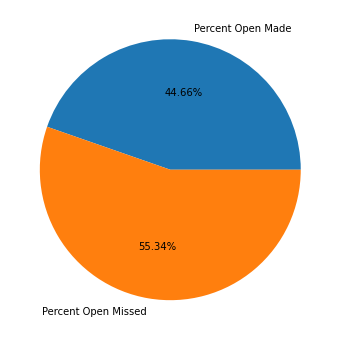

In [41]:
#percentage made
percentage_open_made = len(open_made)/ len(open_shots) *100
open_made["Percent Open Made"] = percentage_open_made 
open_missed = 100 - percentage_open_made
open_made["Percent Open Missed"] = open_missed
open_made
#pie chart for open shots
pie, ax = plt.subplots(figsize=[10,6])
labels = 'Percent Open Made', 'Percent Open Missed'
size = [44.66, 55.34]
ax.pie(size, labels=labels, autopct='%1.2f%%')
pie.savefig("Open.png")

In [51]:
#player that made the most open shots
all_day = open_made['player_name'].value_counts()
all_day

al horford           134
blake griffin        129
serge ibaka          104
stephen curry        102
lamarcus aldridge     91
                    ... 
kendrick perkins       3
greg smith             3
jerome jordan          2
joey dorsey            2
cole aldrich           2
Name: player_name, Length: 280, dtype: int64

In [15]:
#finding defenders less than 6ft
in_your_face = cleaned_df.loc[cleaned_df["CLOSE_DEF_DIST"] <6]
in_your_face

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,...,101187,1.3,1,2,brian roberts,203148,69,2229,1,9
2,21400899,W,24,3,1,0:00,0:00,10.1,2,missed,...,202711,0.9,0,0,brian roberts,203148,0,2160,0,0
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,...,203900,3.4,0,0,brian roberts,203148,707,2147,11,47
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,...,201152,1.1,0,0,brian roberts,203148,634,2074,10,34
5,21400899,W,24,6,2,8:15,9.1,18.4,2,missed,...,101114,2.6,0,0,brian roberts,203148,495,1935,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,...,203935,0.8,0,0,jarrett jack,101127,112,832,1,52
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,...,202323,0.6,1,2,jarrett jack,101127,688,688,11,28
128066,21400006,L,-16,7,4,11:10,23,16.9,2,made,...,201977,4.2,1,2,jarrett jack,101127,670,670,11,10
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,...,202340,3.0,0,0,jarrett jack,101127,157,157,2,37


In [28]:
#shots made with defenders less than 6ft
contested_made = in_your_face.loc[in_your_face["FGM"] == 1]
contested_made

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS,MINUTES,SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,...,101187,1.3,1,2,brian roberts,203148,69,2229,1,9
7,21400899,W,24,8,4,8:00,3.4,3.5,2,made,...,203486,2.1,1,2,brian roberts,203148,480,480,8,0
11,21400890,W,1,3,4,11:32,12.1,14.6,2,made,...,202391,1.8,1,2,brian roberts,203148,692,692,11,32
12,21400890,W,1,4,4,8:55,4.3,5.9,2,made,...,201941,5.4,1,2,brian roberts,203148,535,535,8,55
15,21400859,L,-8,2,2,10:38,6.4,24.7,3,made,...,203923,5.6,1,3,brian roberts,203148,638,2078,10,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128062,21400006,L,-16,3,2,7:46,7,14.5,2,made,...,203935,3.1,1,2,jarrett jack,101127,466,1906,7,46
128063,21400006,L,-16,4,2,5:05,15.3,8.9,2,made,...,203096,5.7,1,2,jarrett jack,101127,305,1745,5,5
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,...,202323,0.6,1,2,jarrett jack,101127,688,688,11,28
128066,21400006,L,-16,7,4,11:10,23,16.9,2,made,...,201977,4.2,1,2,jarrett jack,101127,670,670,11,10


C:\Users\cfcha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cfcha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


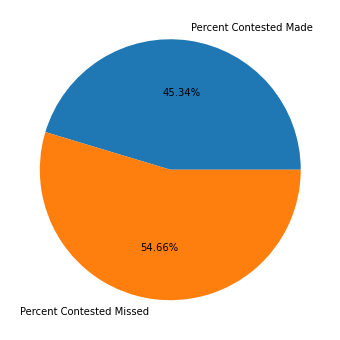

In [35]:
#percentage made with close defender
percentage_close_made = len(closeness_made)/ len(in_your_face) *100
contested_made["Percent Contested Made"] = percentage_close_made
contested_missed = 100 - percentage_close_made
contested_missed
contested_made["Percent Contested Missed"] = contested_missed
contested_made

#total_shots_made = len(closeness_made) + len(open_made)
#creating pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = 'Percent Contested Made', 'Percent Contested Missed'
size = [45.34, 54.66]
ax.pie(size, labels=labels, autopct='%1.2f%%')
pie.savefig("Contested.png")

In [50]:
#player that made the most contested shots
try_me = contested_made['player_name'].value_counts()
try_me

james harden      423
lebron james      410
anthony davis     401
nikola vucevic    400
mnta ellis        399
                 ... 
hedo turkoglu      31
joe harris         27
greg smith         26
alan crabbe        23
mike miller        14
Name: player_name, Length: 281, dtype: int64

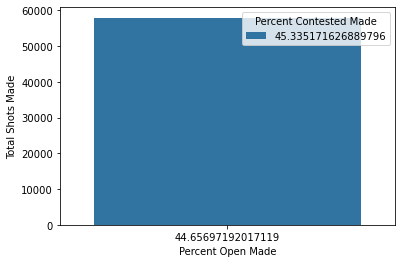

In [19]:
#graph time
#finding total shots made between both stats
#figure = sns.barplot(x="Percent Open Made", y=("Total Shots Made"), hue="Percent Contested Made", data=open_shot_vs_in_your_face)

In [20]:
#eploratory/messing with data
#trying to find who attempted the most shots
#player_count = cleaned_df["player_name"].value_counts()
# find out percentage of their made shots
#player_count.head()


In [21]:
#cleaned_df["CLOSE_DEF_DIST"].value_counts()

In [22]:
#cleaned_df["SHOT_DIST"].value_counts()
#cleaned_df.plot(kind="scatter", x="SHOT_DIST", y="SHOT_CLOCK", grid=True, figsize=(8,8),
              #title="Shot Distance Vs. Time remaing on Shot Clock")

In [23]:
#cleaned_df["SHOT_CLOCK"].value_counts()

In [24]:
#cleaned_df.plot(kind="scatter", x="SHOT_DIST", y="CLOSE_DEF_DIST", grid=True, figsize=(8,8), c = "SHOT_DIST",
 #              title="Defender Distance vs. Shot Distance")